In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [ ]:
df = pd.read_csv('House Data.csv')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
df.shape

(4600, 18)

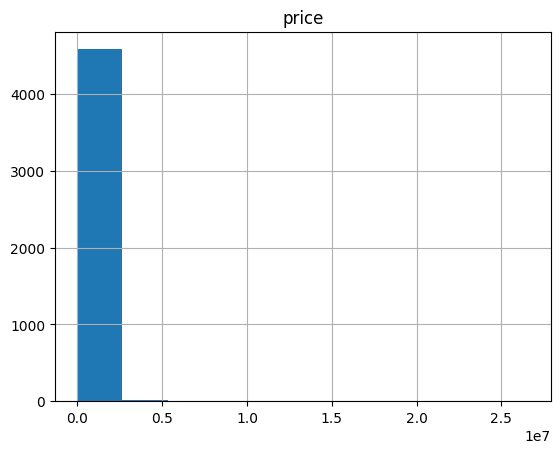

In [ ]:
df.hist("price")
plt.show()

<Axes: xlabel='sqft_living', ylabel='sqft_lot'>

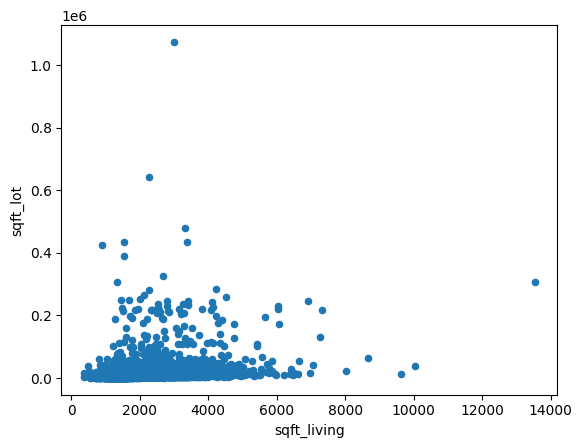

In [ ]:
df.plot(kind="scatter", x="sqft_living", y="sqft_lot")

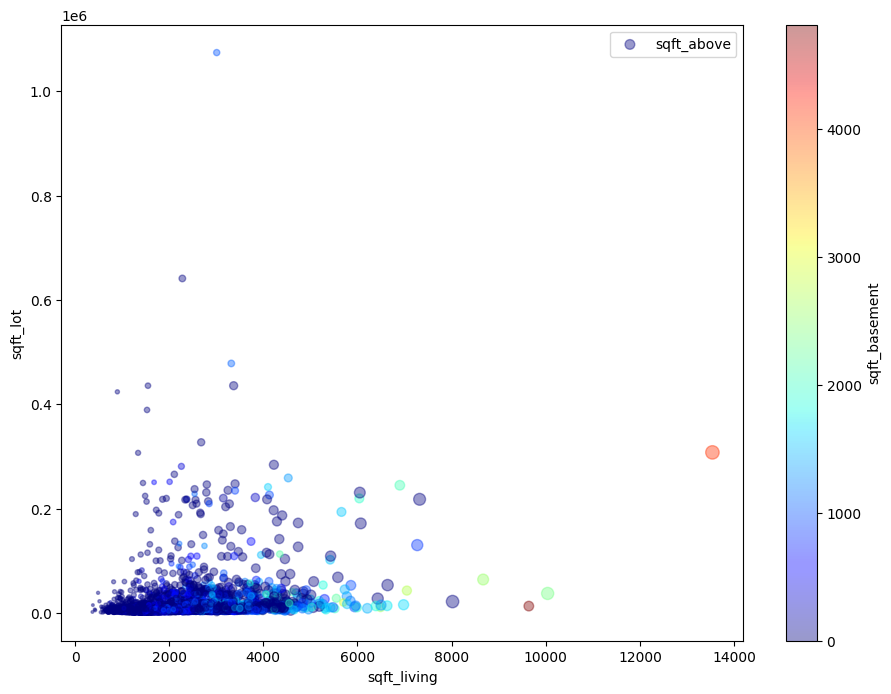

In [ ]:
df.plot(kind="scatter", x="sqft_living", y="sqft_lot", alpha=0.4,
 s=df["sqft_above"]/100, label="sqft_above", figsize=(11,8),
 c="sqft_basement", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

In [ ]:
df.isna().any()

date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
street           False
city             False
statezip         False
country          False
dtype: bool

In [ ]:
df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [ ]:
df.shape

(4600, 18)

In [ ]:
X=pd.DataFrame(columns=['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','sqft_above','sqft_basement','	yr_built','yr_renovated','street','city','statezip','country'],data=df)
y=pd.DataFrame(columns=['price'],data=df)


In [ ]:
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,\tyr_built,yr_renovated,street,city,statezip,country
0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,NaN,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,NaN,0,709 W Blaine St,Seattle,WA 98119,USA
2,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,NaN,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,NaN,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,NaN,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
X = pd.get_dummies(data = X, columns = ['street','city','statezip','country'] , prefix = ['street','city','statezip','country'] , drop_first = True)

In [ ]:
y.head()

,price
0,313000.0
1,2384000.0
2,342000.0
3,420000.0
4,550000.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
X_train.shape

(3220, 4655)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1047: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1052: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1072: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [ ]:
X_train

array([[-0.43585706, -1.46116072, -1.12404178, ..., -0.12301386,
        -0.01762542, -0.02492998],
       [ 1.81508077,  0.76024509,  1.22886027, ..., -0.12301386,
        -0.01762542, -0.02492998],
       [-0.43585706,  0.12555772,  0.24848442, ..., -0.12301386,
        -0.01762542, -0.02492998],
       ...,
       [ 1.81508077,  0.76024509, -0.05078821, ..., -0.12301386,
        -0.01762542, -0.02492998],
       [ 0.68961185,  0.44290141,  0.97086662, ..., -0.12301386,
        -0.01762542, -0.02492998],
       [-0.43585706, -0.50912966, -0.44293855, ..., -0.12301386,
        -0.01762542, -0.02492998]])

In [ ]:
model = tf.keras.models.Sequential([

         tf.keras.layers.Dense(X.shape[1], activation='relu', input_dim = X.shape[1]),
         tf.keras.layers.Dense(512,kernel_initializer='normal', activation='relu'),
         tf.keras.layers.Dense(512,kernel_initializer='normal', activation='relu'),
         tf.keras.layers.Dense(256,kernel_initializer='normal', activation='relu'),
         tf.keras.layers.Dense(128,kernel_initializer='normal', activation='relu'),
         tf.keras.layers.Dense(64,kernel_initializer='normal', activation='relu'),
         tf.keras.layers.Dense(32,kernel_initializer='normal', activation='relu'),
         tf.keras.layers.Dense(1,kernel_initializer='normal', activation='relu'),
])

In [ ]:
X.shape[0]

4600

In [ ]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 4655)              21673680  
                                                                 
 dense_9 (Dense)             (None, 512)               2383872   
                                                                 
 dense_10 (Dense)            (None, 512)               262656    
                                                                 
 dense_11 (Dense)            (None, 256)               131328    
                                                                 
 dense_12 (Dense)            (None, 128)               32896     
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 32)               

In [ ]:
history = model.fit(X_train, y_train.to_numpy(), batch_size = 50, epochs = 5, verbose = 1)

Epoch 1/5
65/65 [==============================] - 34s 518ms/step - loss: nan - mse: nan - mae: nan
Epoch 2/5
65/65 [==============================] - 33s 509ms/step - loss: nan - mse: nan - mae: nan
Epoch 3/5
65/65 [==============================] - 36s 547ms/step - loss: nan - mse: nan - mae: nan
Epoch 4/5
65/65 [==============================] - 34s 519ms/step - loss: nan - mse: nan - mae: nan
Epoch 5/5
65/65 [==============================] - 33s 502ms/step - loss: nan - mse: nan - mae: nan


In [ ]:
model.predict(X_test)

44/44 [==============================] - 3s 62ms/step


array([[nan],
       [nan],
       [nan],
       ...,
       [nan],
       [nan],
       [nan]], dtype=float32)

In [ ]:
model.evaluate(X_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - mse: 0.0000e+00 - mae: 0.0000e+00


[0.0, 0.0, 0.0]

In [ ]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 2s 48ms/step - loss: nan - mse: nan - mae: nan


[nan, nan, nan]